# 전국 실업률 분포 변화

다음 데이터는 2000년부터 2022년까지 행정구역(시도)/연령별 실업률 데이터의 일부이다. 

| 시도별   | 연령계층별  | 2000 | 2001 | 2002 | 2003 |
|-------|--------|------|------|------|------|
| 서울특별시 | 15-29세 | 8.1  | 8.4  | 8.2  | 8.8  |
|       | 30-59세 | 3.9  | 3.6  | 3.0  | 3.2  |
|       | 60세이상  | 2.9  | 1.9  | 2.3  | 1.9  |
| 부산광역시 | 15-29세 | 12.1 | 10.7 | 7.6  | 9.0  |
|       | 30-59세 | 5.5  | 4.2  | 2.9  | 2.9  |
|       | 60세이상  | 5.3  | 3.6  | 2.1  | 1.5  |

전체 데이터는 아래의 URL을 통해 확인할 수 있다.

> https://data.hossam.kr/pydata/unemployment_age.xlsx 
>
> 출처: 국가통계포털

이 데이터를 토대로 지역별 실업률 어떻게 변화하고 있는지 확인해 보자.

## #01. 준비작업

### [1] 패키지 참조

In [43]:
import sys
from pandas import read_excel, melt, pivot_table
from matplotlib import pyplot as plt

### [2] 그래프 초기화

In [44]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 9
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams["figure.dpi"] = 200
plt.rcParams["axes.unicode_minus"] = False

### [3] 데이터 가져오기

`0`번째 열과 `1`번째 열을 복수 인덱스로 지정

In [45]:
origin = read_excel("https://data.hossam.kr/pydata/unemployment_age.xlsx",
                    index_col=[0, 1])
origin.head()

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
시도별   연령계층별                                                               ...   
서울특별시 15-29세   8.1   8.4   8.2   8.8   8.9   8.9   8.8   7.4   7.6   8.1  ...   
      30-59세   3.9   3.6   3.0   3.2   3.4   3.6   3.4   3.2   3.0   3.7  ...   
      60세이상    2.9   1.9   2.3   1.9   2.1   2.1   2.6   1.7   1.8   2.3  ...   
부산광역시 15-29세  12.1  10.7   7.6   9.0   9.9   8.8   8.2   8.3   8.1   9.0  ...   
      30-59세   5.5   4.2   2.9   2.9   3.1   3.3   3.2   3.0   2.9   3.5  ...   

              2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  
시도별   연령계층별                                                               
서울특별시 15-29세   8.7  10.4   9.3  10.3  10.1  10.1   8.8   9.1   9.0   6.8  
      30-59세   3.0   3.2   3.1   2.9   3.3   3.5   3.2   3.3   3.6   2.4  
      60세이상    2.5   2.8   3.2   2.8   3.6   4.0   4.3   4.7   5.1   3.6  
부산광역시 15-29세   8.8   9.0   9.7   9.9  11.5   9.5   9.1  10.6   7.7   6.8  
      30-59세   3.0   3.0   3.1   2.8   3.2   3.2   2.4   2.9   2.4   2.2  

[5 rows x 23 columns]

## #02. 데이터 전처리

### [1] 인덱스 해제

In [46]:
df = origin.reset_index()
df.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


## #03. 시각화

### [1] 년도에 따른 전국 평균 실업률 변화

#### (1) 데이터 전처리

##### 데이터 재구조화

In [47]:
df2 = melt(df, id_vars=['시도별', '연령계층별'],
           var_name='년도', value_name='실업률')
df2.head()

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5


##### 시/도에 따른 년도별 평균 실업률

In [48]:
tdf1 = df2[['시도별', '년도', '실업률']].groupby(['시도별', '년도'], as_index=False).mean()
tdf1

,시도별,년도,실업률
0,강원도,2000,2.766667
1,강원도,2001,2.333333
2,강원도,2002,2.100000
3,강원도,2003,2.566667
4,강원도,2004,2.633333
...,...,...,...
386,충청북도,2018,3.400000
387,충청북도,2019,4.200000
388,충청북도,2020,4.466667
389,충청북도,2021,3.433333


##### 전국에 대한 년도별 평균 실업률

In [49]:
tdf2 = tdf1[['년도','실업률']].groupby('년도').mean()
tdf2

,실업률
년도,
2000,4.103922
2001,3.762745
2002,3.154902
2003,3.437255
2004,3.582353
2005,3.584314
2006,3.488235
2007,3.343137
2008,3.282353


#### (2) 데이터 시각화

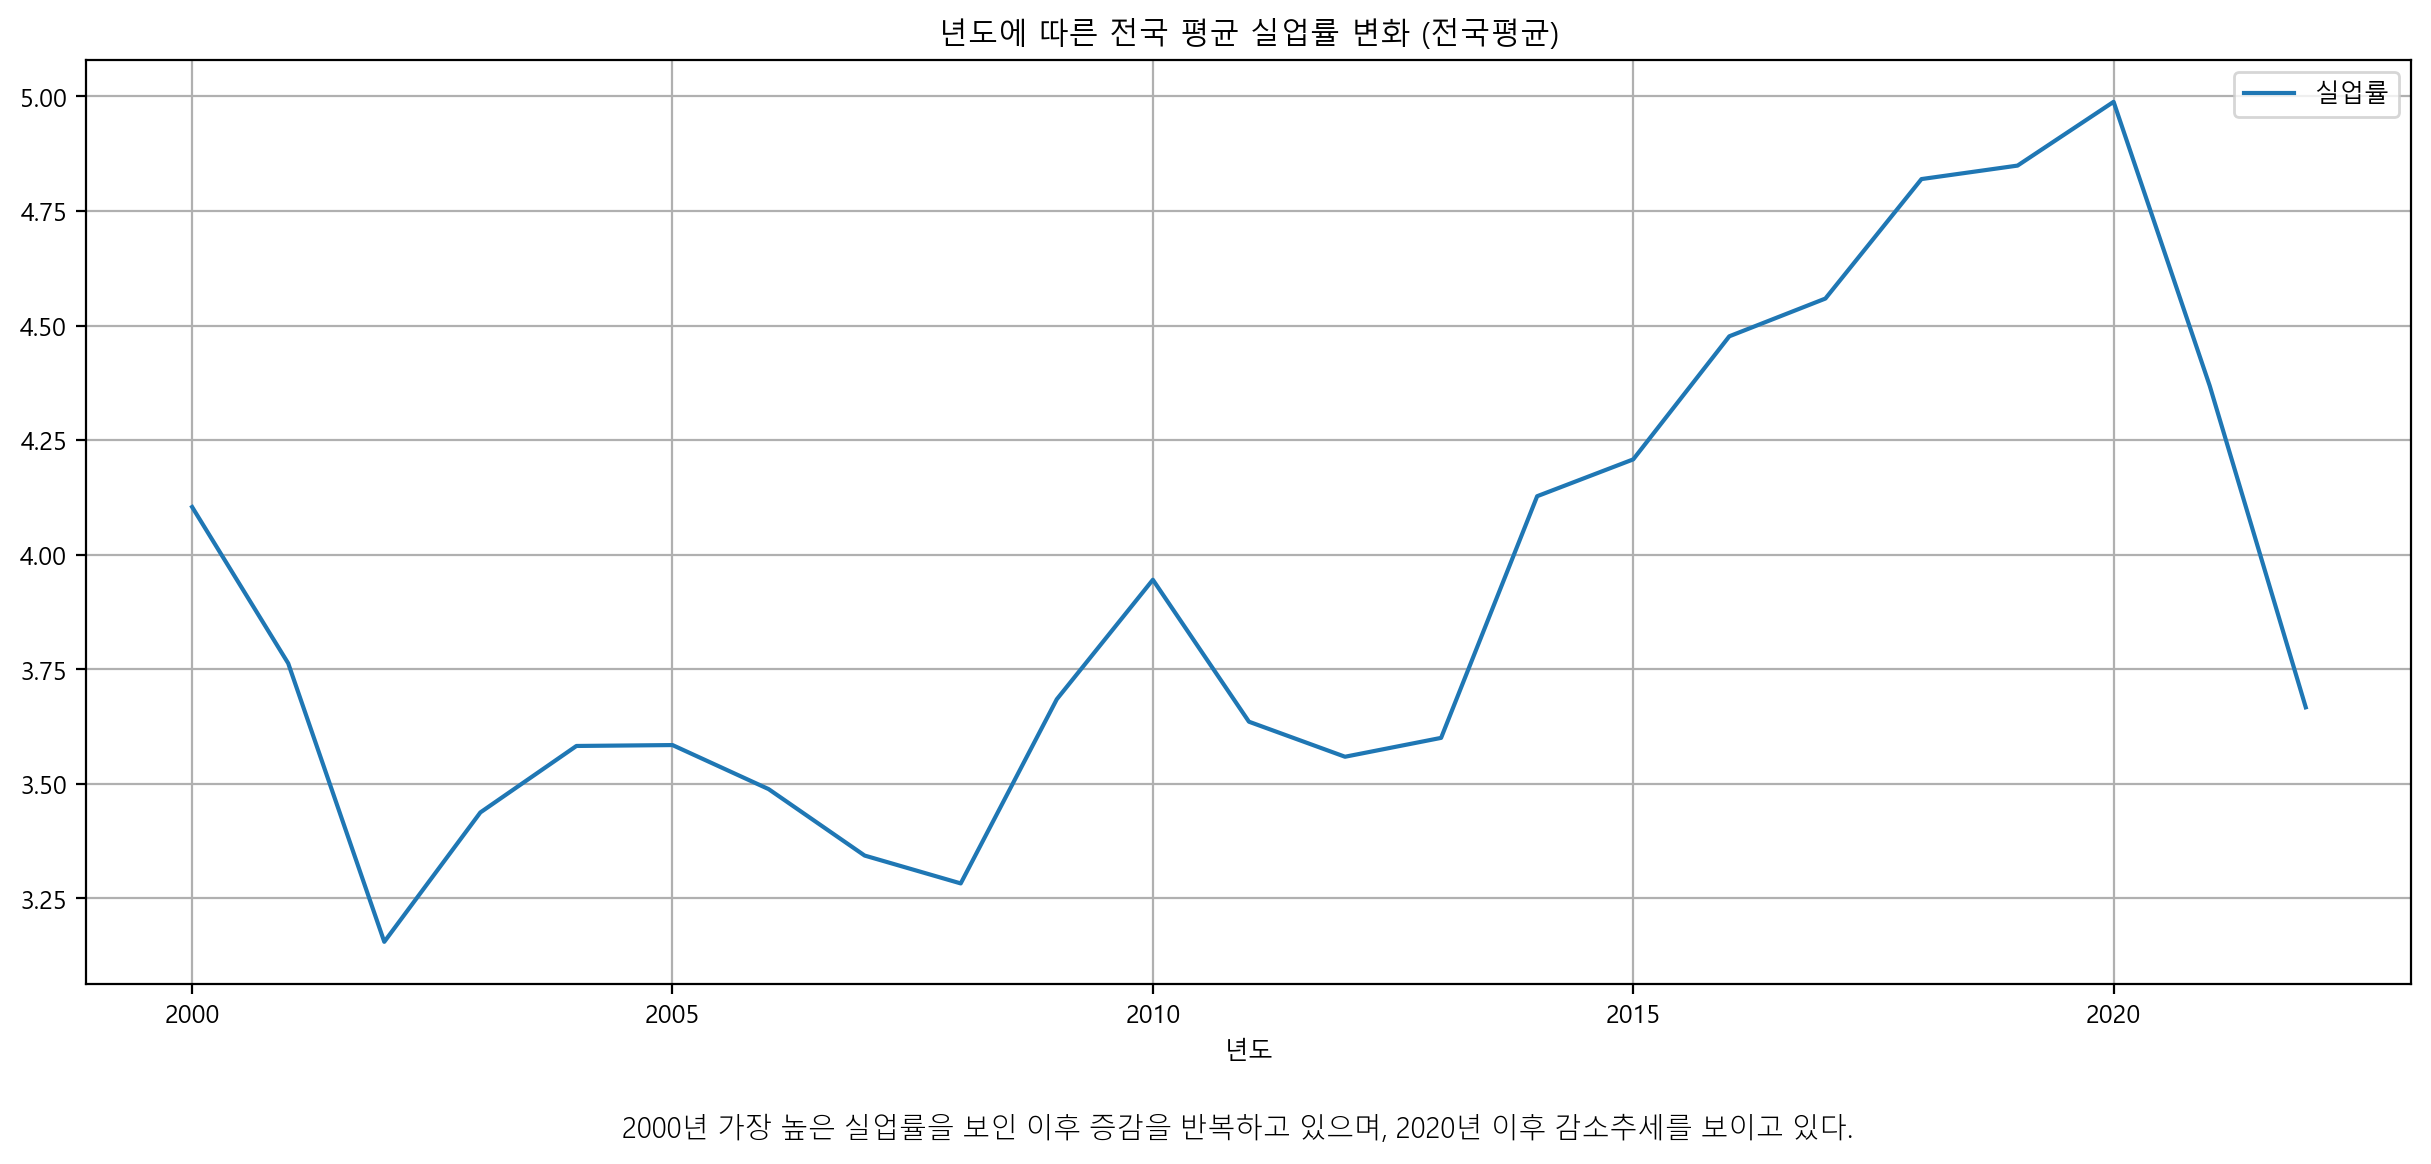

In [50]:
tdf2.plot()
plt.title("년도에 따른 전국 평균 실업률 변화 (전국평균)")
plt.grid()

txt = """2000년 가장 높은 실업률을 보인 이후 증감을 반복하고 있으며, 2020년 이후 감소추세를 보이고 있다. """
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

### [2] 년도에 따른 연령대별 전국 평균 실업률 변화

#### (1) 데이터 전처리

> 앞에서 만든 데이터 재구조화 결과에 이어서 진행

##### 데이터 그룹별 집계

In [51]:
gdf = df2.filter(['년도', '연령계층별', '실업률']).groupby(['년도', '연령계층별'], as_index=False).mean()
gdf

,년도,연령계층별,실업률
0,2000,15-29세,7.735294
1,2000,30-59세,3.052941
2,2000,60세이상,1.523529
3,2001,15-29세,7.435294
4,2001,30-59세,2.605882
...,...,...,...
64,2021,30-59세,2.364706
65,2021,60세이상,3.570588
66,2022,15-29세,6.205882
67,2022,30-59세,1.982353


##### 피벗테이블 구성

In [52]:
pdf = pivot_table(gdf,                  # 피벗할 데이터프레임
                  index = '년도',        # 행 위치에 들어갈 열
                  columns = '연령계층별', # 열 위치에 들어갈 열
                  values = '실업률'        # 데이터로 사용할 열
)

pdf

연령계층별,15-29세,30-59세,60세이상
년도,,,
2000,7.735294,3.052941,1.523529
2001,7.435294,2.605882,1.247059
2002,6.470588,2.000000,0.994118
2003,7.223529,2.152941,0.935294
2004,7.552941,2.200000,0.994118
2005,7.135294,2.341176,1.276471
2006,7.200000,2.052941,1.211765
2007,6.729412,2.029412,1.270588
2008,6.541176,2.070588,1.235294


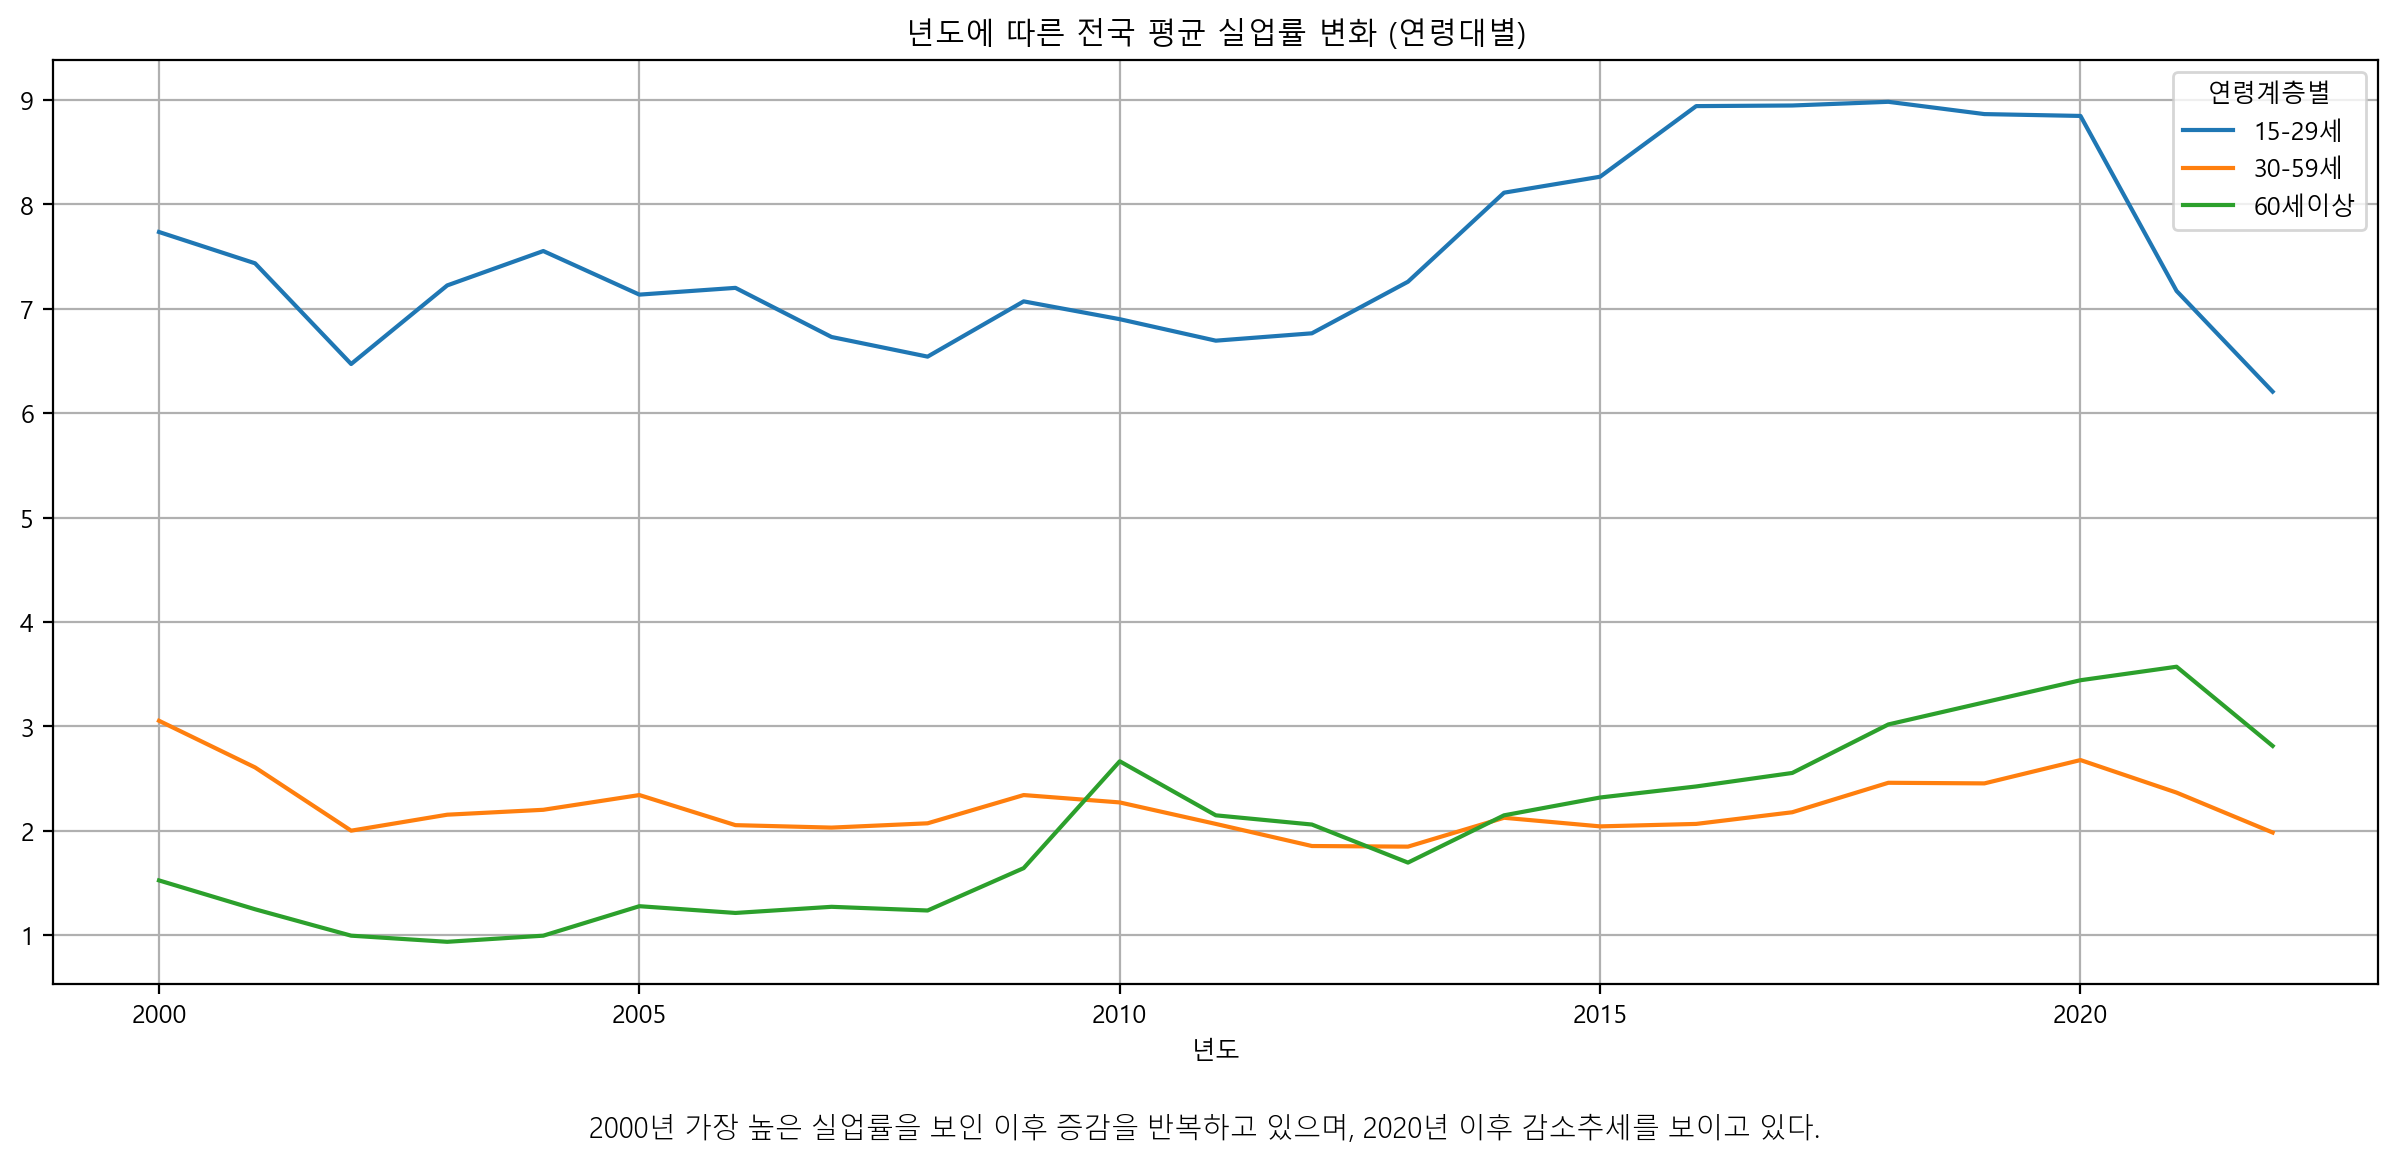

In [53]:
pdf.plot()
plt.title("년도에 따른 전국 평균 실업률 변화 (연령대별)")
plt.grid()

txt = """2000년 가장 높은 실업률을 보인 이후 증감을 반복하고 있으며, 2020년 이후 감소추세를 보이고 있다. """
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()

## #04. 두 그래프를 서브플롯으로 구현

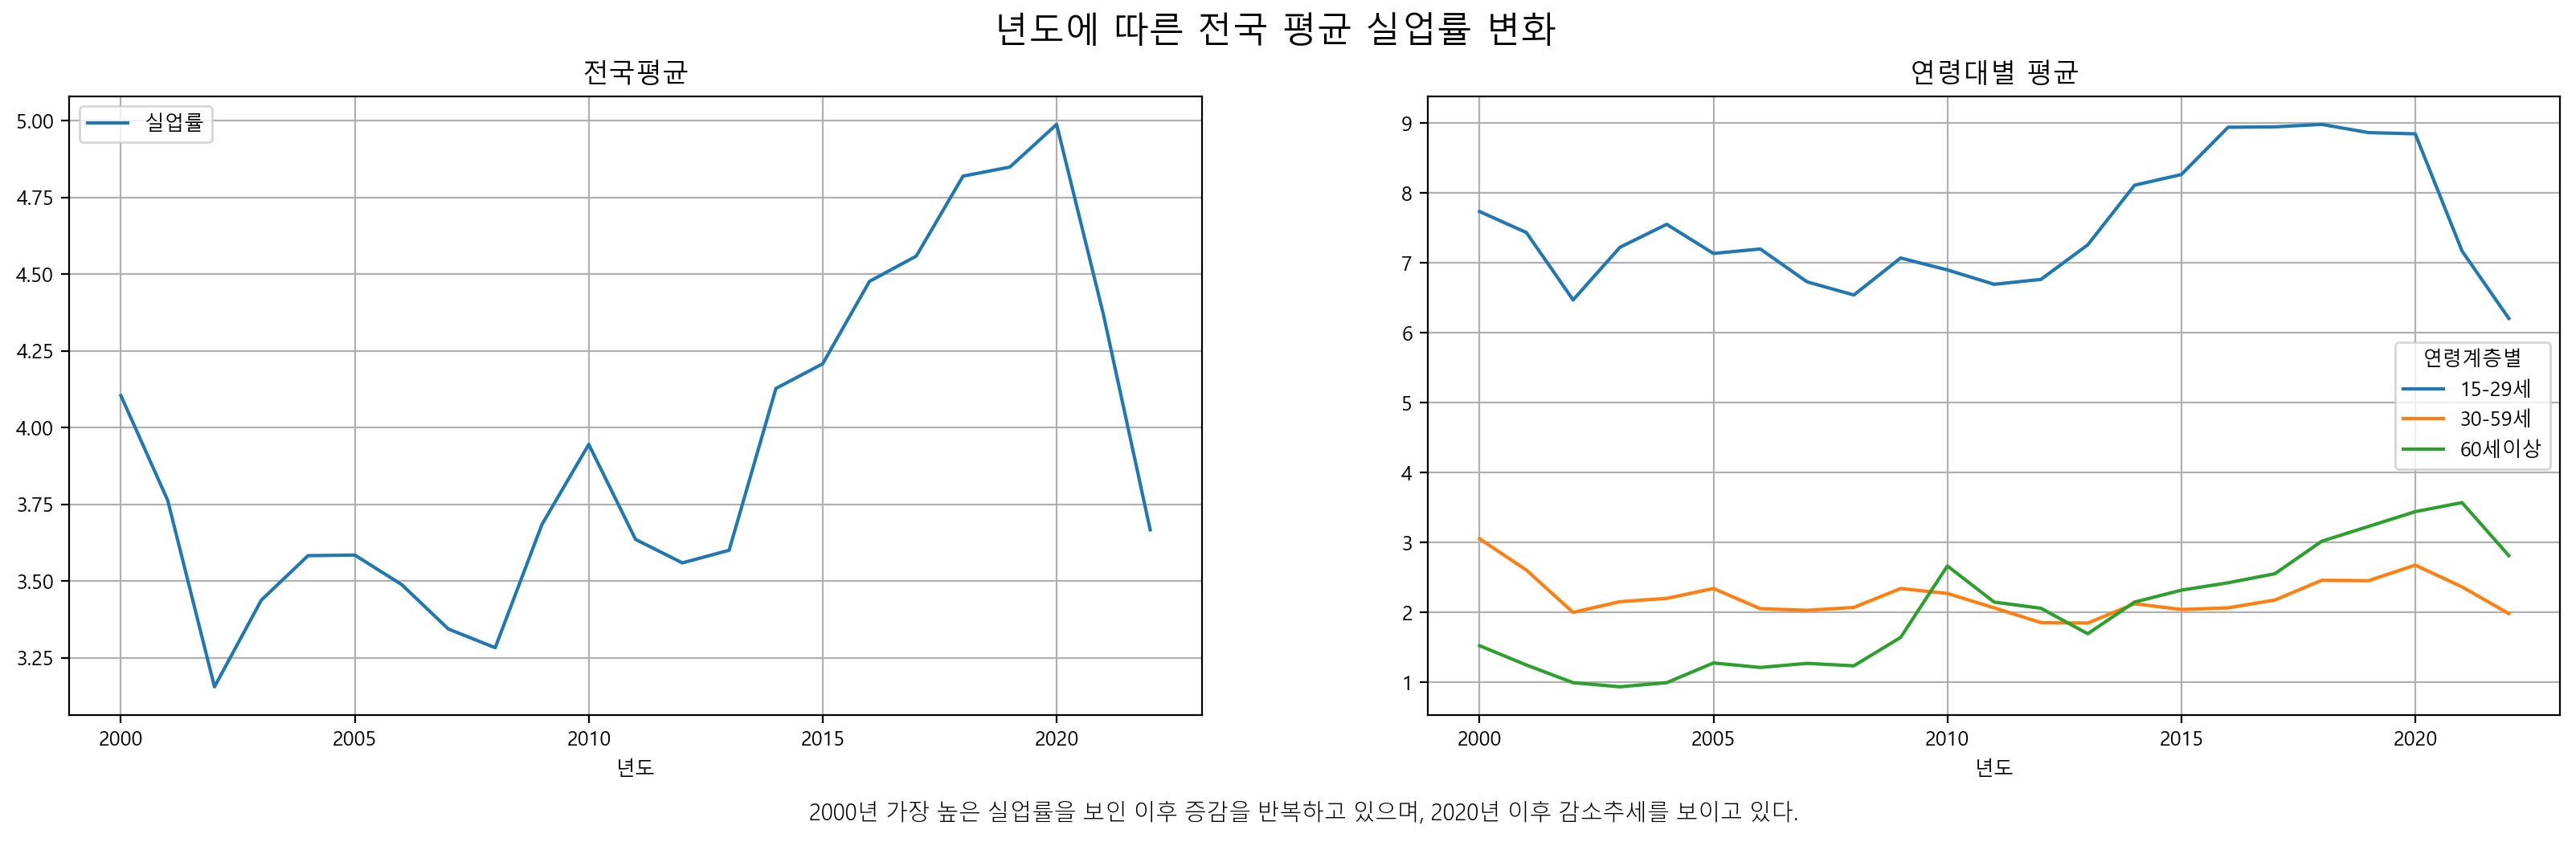

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# 전체 제목
fig.suptitle('년도에 따른 전국 평균 실업률 변화', fontsize=16, color='#000000')

tdf2.plot(ax=ax1)
ax1.title.set_text("전국평균")
ax1.title.set_fontsize(12)
ax1.grid()

pdf.plot(ax=ax2)
ax2.title.set_text("연령대별 평균")
ax2.title.set_fontsize(12)
plt.grid()

txt = """2000년 가장 높은 실업률을 보인 이후 증감을 반복하고 있으며, 2020년 이후 감소추세를 보이고 있다. """
plt.figtext(0.51, 0, txt, wrap=True,
            verticalalignment="top", horizontalalignment="center",
            fontdict={"size": 10, "weight": "light"})

plt.show()
plt.close()